<a href="https://colab.research.google.com/github/allandevbr92/MyResume/blob/master/analiseEnem2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Enem2022/MICRODADOS_ENEM_2022.csv', encoding='ISO-8859-1', delimiter=';')

# Nota Média em Redação e Geral - Masculino X Feminino

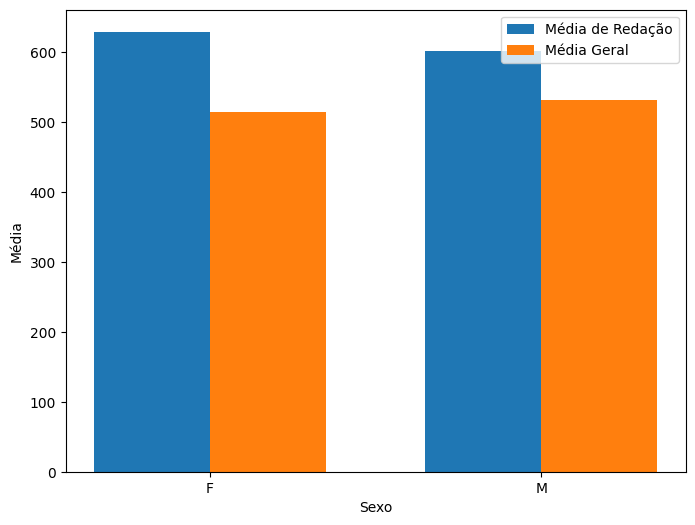

Média de redação - Masculino: 601.8925326778389
Média de redação - Feminino: 628.9229186627261
Média geral - Masculino: 531.7650208381059
Média geral - Feminino: 513.7115433188579


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você já tenha carregado os dados em um dataframe chamado 'df'

# Calculando as médias de redação e médias gerais por sexo
media_redacao = df.groupby('TP_SEXO')['NU_NOTA_REDACAO'].mean()
media_geral = df.groupby('TP_SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean().mean(axis=1)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
x = range(len(media_redacao))
bar_width = 0.35

# Médias de Redação
rects1 = ax.bar(x, media_redacao, bar_width, label='Média de Redação')
# Médias Gerais
rects2 = ax.bar([i + bar_width for i in x], media_geral, bar_width, label='Média Geral')

# Definindo os rótulos dos eixos x e y
ax.set_xlabel('Sexo')
ax.set_ylabel('Média')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(media_redacao.index)

# Adicionando uma legenda
ax.legend()

# Exibindo o gráfico
plt.show()

# Filtrando apenas os candidatos do sexo masculino
masculino = df[df['TP_SEXO'] == 'M']

# Calculando a média da nota de redação para o sexo masculino
media_redacao_masculino = masculino['NU_NOTA_REDACAO'].mean()

# Calculando a média geral para o sexo masculino
media_geral_masculino = masculino[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean().mean()

# Filtrando apenas os candidatos do sexo feminino
feminino = df[df['TP_SEXO'] == 'F']

# Calculando a média da nota de redação para o sexo feminino
media_redacao_feminino = feminino['NU_NOTA_REDACAO'].mean()

# Calculando a média geral para o sexo feminino
media_geral_feminino = feminino[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean().mean()

# Imprimindo os resultados
print("Média de redação - Masculino:", media_redacao_masculino)
print("Média de redação - Feminino:", media_redacao_feminino)
print("Média geral - Masculino:", media_geral_masculino)
print("Média geral - Feminino:", media_geral_feminino)